In [33]:
import numpy as np
from scipy.io import wavfile


audio = "audio.wav"

fs = 44100

def simple_wave( frequencia_fundamental,duracao_wav):
    f = frequencia_fundamental
    t = duracao_wav
    samples = np.linspace(0, t, int(fs*t), endpoint=False)
    signal = np.sin(2 * np.pi * f * samples)
    signal *= 32767
    signal = np.int16(signal)
    return signal

signal = simple_wave(400, 5)

wav_1 = wavfile.write(audio, fs, signal)

In [34]:
import IPython
IPython.display.Audio(audio)

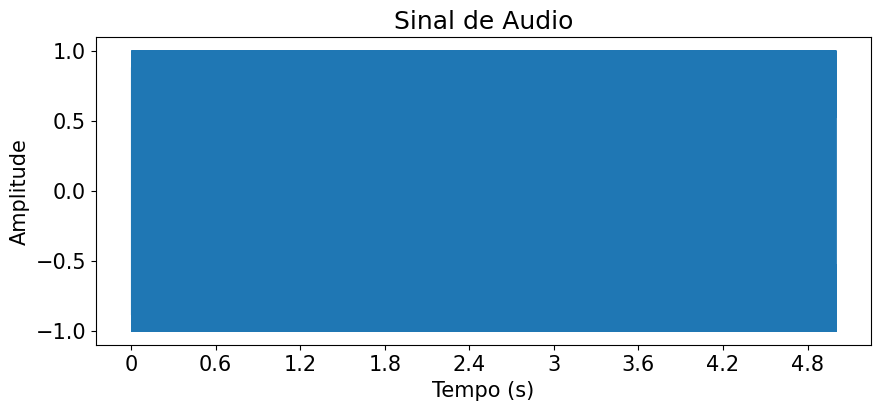

In [35]:
import matplotlib
import librosa
import librosa.display
import matplotlib.pyplot as plt


#Carregar arquivo de áudio
def load_audio(file_path):
  signal, sr = librosa.load(file_path,sr=None)
  return signal, sr

#Plot sinal de audio
def plot_waveform(signal,sr):
  plt.figure(figsize=(10,4))
  librosa.display.waveshow(signal, sr=sr)
  plt.title("Sinal de Audio")
  plt.xlabel("Tempo (s)")
  plt.ylabel("Amplitude")
  plt.show()

#Diretório do áudio
file_path = audio

#Carregar o áudio
signal,sr = load_audio(file_path)

#Plot o sinal de áudio
plot_waveform(signal,sr)

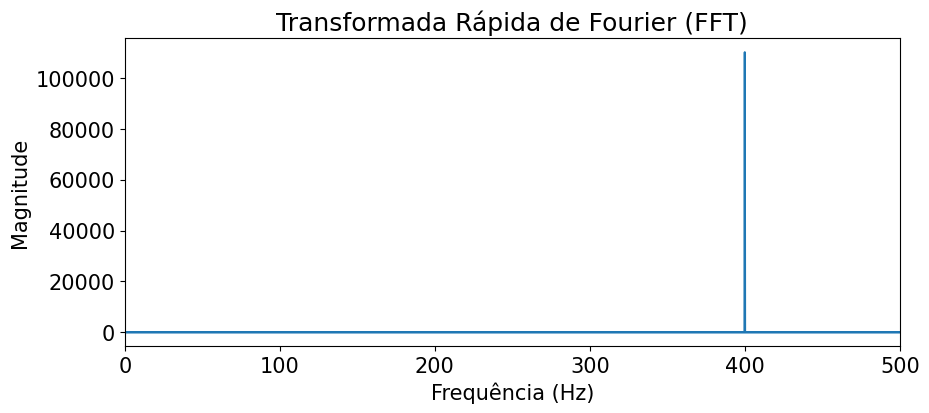

In [36]:

def compute_fft(signal):
  fft_result = np.fft.fft(signal)
  return fft_result

def plot_fft(fft_result, sr):
  freqs = np.fft.fftfreq(len(fft_result), 1/sr)
  magnitude = np.abs(fft_result)
  plt.figure(figsize=(10,4))
  plt.plot(freqs, magnitude)
  plt.title("Transformada Rápida de Fourier (FFT)")
  plt.xlabel("Frequência (Hz)")
  plt.ylabel("Magnitude")
  plt.xlim(0,500)
  plt.show()

fft_result = compute_fft(signal)
plot_fft(fft_result,sr)

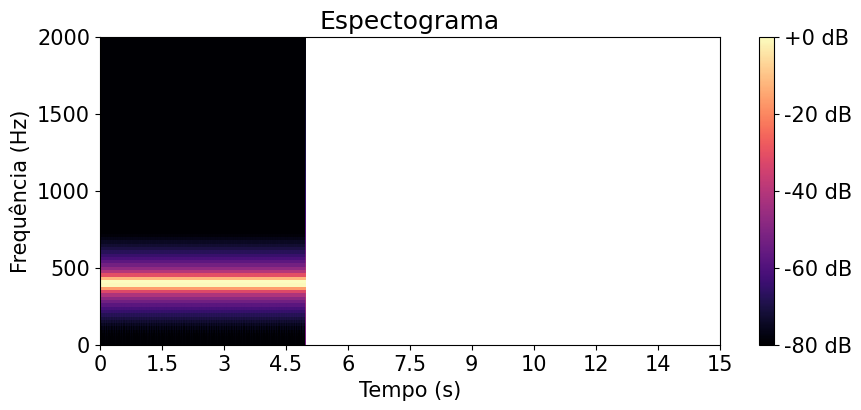

In [37]:
def plot_spectogram(signal, sr):
  D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
  plt.figure(figsize=(10,4))
  librosa.display.specshow(D, y_axis='linear', sr=sr, x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  plt.title("Espectograma")
  plt.xlabel("Tempo (s)")
  plt.ylabel("Frequência (Hz)")
  plt.ylim(0,2000)
  plt.xlim(0,15)
  plt.show()

plot_spectogram(signal,sr)

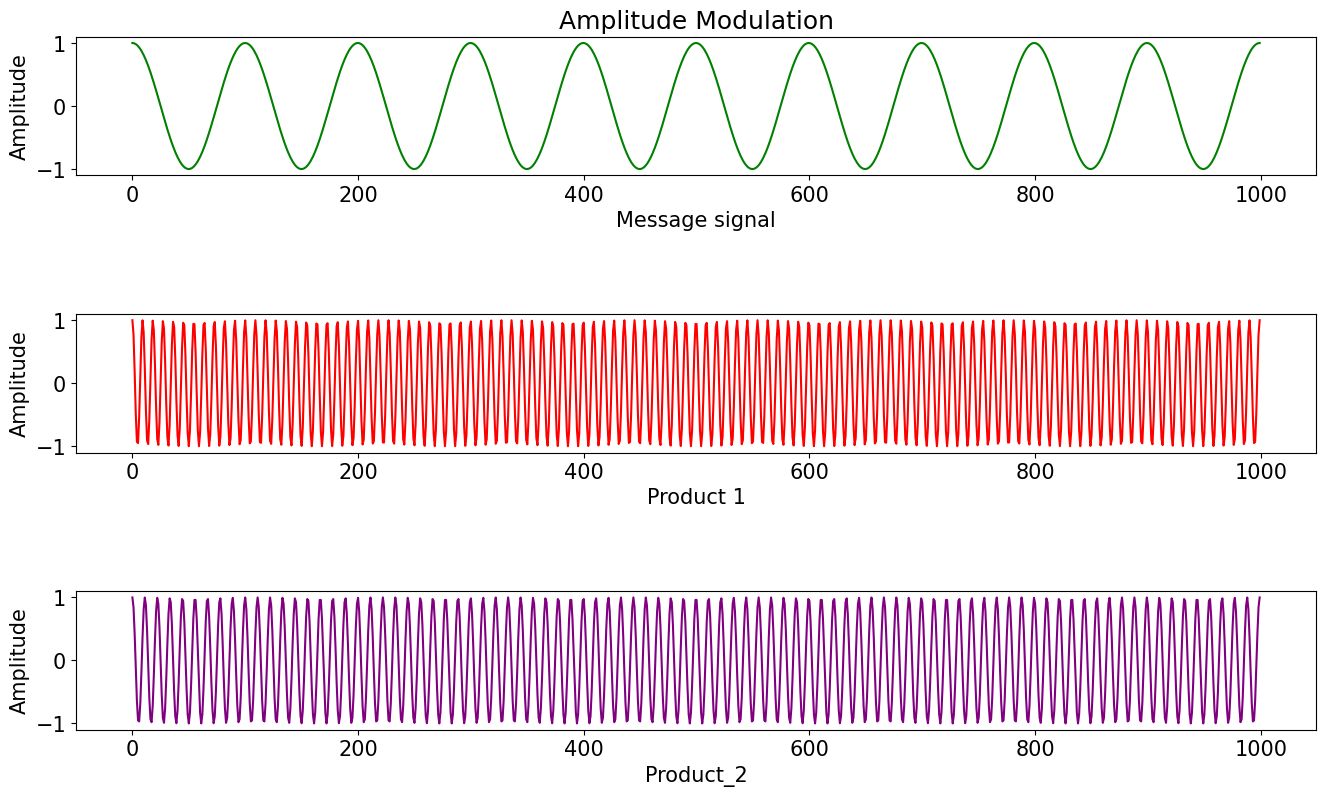

In [60]:
import numpy as np
import matplotlib.pyplot as plt

#Carrier wave c(t)=A_c*cos(2*pi*f_c*t)
#Modulating wave m(t)=A_m*cos(2*pi*f_m*t)
#Modulated wave s(t)=A_c[1+mu*cos(2*pi*f_m*t)]cos(2*pi*f_c*t)

#carrier_amplitude
A_c = 1
#carrier_frequency
f_c = 100
#message_amplitude
A_m = 1
#message_frequency
f_m = 10

modulation_index = 2

t = np.linspace(0, 1, 1000)

carrier = A_c*np.cos(2*np.pi*f_c*t)
modulator = A_m*np.cos(2*np.pi*f_m*t)
#product = A_c*(1+modulation_index*np.cos(2*np.pi*f_m*t))*np.cos(2*np.pi*f_c*t)
#product = A_c*(np.cos(2*np.pi*f_m*t))*np.cos(2*np.pi*f_c*t)
product_1 = A_c*(np.cos(2*np.pi*f_m*t))*np.cos(2*np.pi*f_c*t) - A_c*(np.sin(2*np.pi*f_m*t))*np.sin(2*np.pi*f_c*t)
product_2 = A_c*(np.cos(2*np.pi*f_m*t))*np.cos(2*np.pi*f_c*t) + A_c*(np.sin(2*np.pi*f_m*t))*np.sin(2*np.pi*f_c*t)


plt.subplot(3,1,1)
plt.title('Amplitude Modulation')
plt.plot(modulator,'g')
plt.ylabel('Amplitude')
plt.xlabel('Message signal')

plt.subplot(3,1,2)
plt.plot(product_1, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Product 1')

plt.subplot(3,1,3)
plt.plot(product_2, color="purple")
plt.ylabel('Amplitude')
plt.xlabel('Product_2')

plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(16, 9)

fig.savefig('Amplitude Modulation.png', dpi=100)

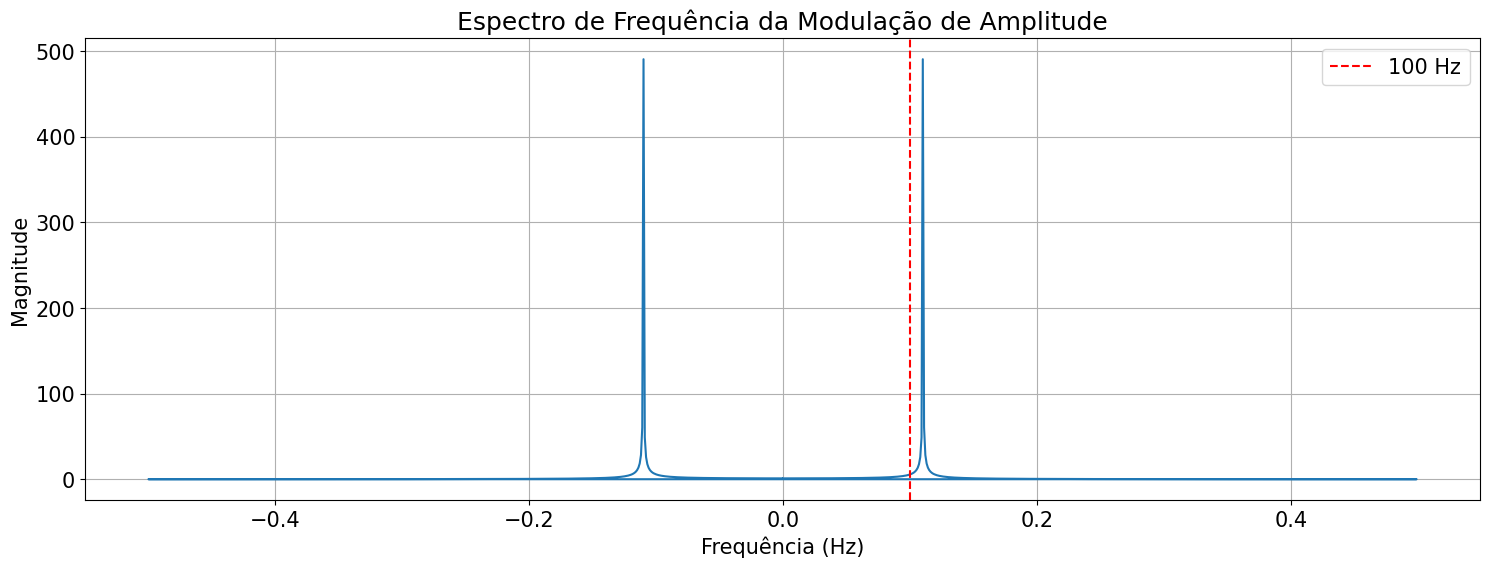

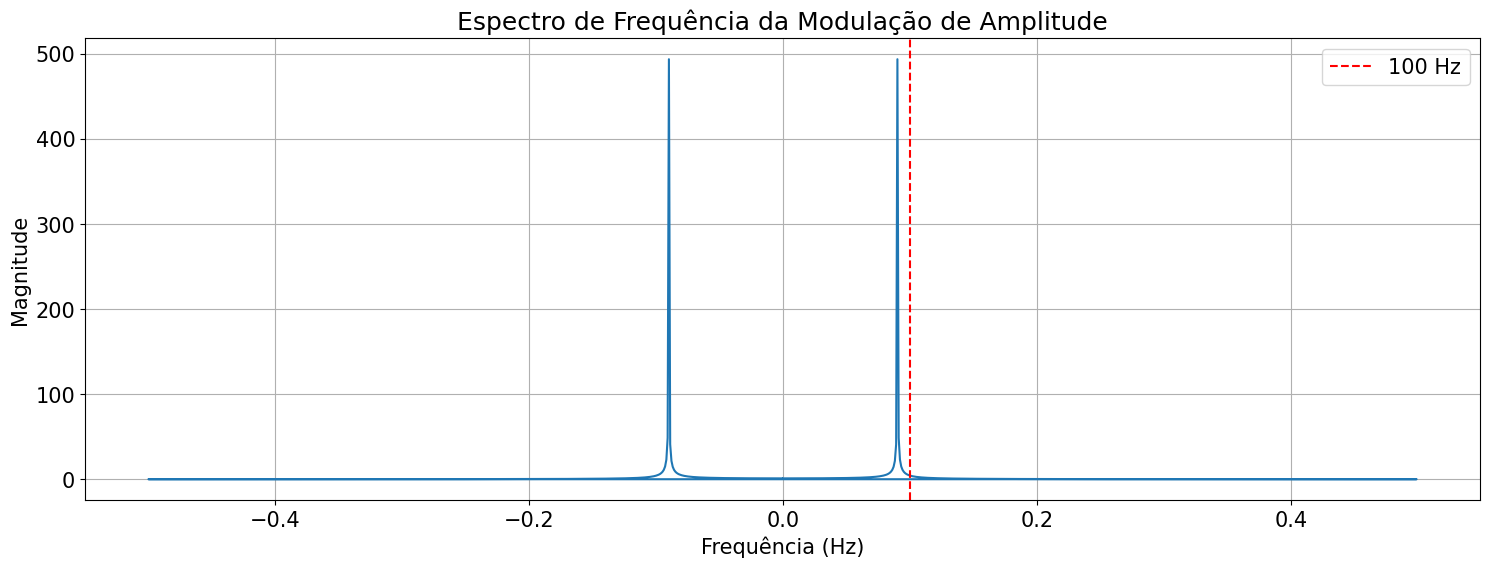

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fft_spectrum(product, f_c):
    fft_result = np.fft.fft(product)
    freqs = np.fft.fftfreq(len(fft_result))

    plt.figure(figsize=(18, 6))
    plt.plot(freqs, np.abs(fft_result))
    plt.title('Espectro de Frequência da Modulação de Amplitude')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.axvline(x=f_c/1000, color='r', linestyle='dashed', label='100 Hz')
    plt.legend()
    plt.show()

# Supondo que 'product_1' e 'product_2' sejam os sinais de entrada
f_c = 100  # Frequência de corte

plot_fft_spectrum(product_1, f_c)
plot_fft_spectrum(product_2, f_c)
